<a href="https://colab.research.google.com/github/fabiobrambilla98/InfoRetrival/blob/main/clustering_cm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def levenshteinDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

In [4]:
levenshteinDistance("ciao", "cjkoj")

3

In [5]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [6]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='train')

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#data | filenames | target_names | target | DESCR

In [9]:
corpus_size = 1000

In [10]:
corpus = [x for x in news['data'][:corpus_size]]

In [141]:
target_names = news['target_names'][:corpus_size]

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [104]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [318]:
def contains(y):
  l = ["\\", "/", "'", "@", "<", ">", "-", "_", "#", "*", "}", "{", "|", "[", "]", " ", "+", ".", ",", ":", "^", "=", "&", "%", "$", "£", "~", "þ", 'ÿ', '1', '2', '3', '4', '5', '6', '7', '8', '9', '\t', '\n', '!', '?', '"', "(", ")", '0', ";", 'I', '`', 'aa', 'oo', 'uu', 'ii', 'ee']
  for c in l:
    if c in y:
      return False

  return True

In [330]:
from nltk.stem import PorterStemmer

In [331]:
ps = PorterStemmer()

In [337]:
ps.stem("lolllla")

'lolllla'

In [352]:
tokenizer = lambda x: [ps.stem(y.lemma_) for y in nlp(x.lower()) if contains(y.lemma_) and len(y.lemma_) > 2]

In [353]:
vectorizer = TfidfVectorizer(tokenizer = tokenizer)

In [354]:
X = vectorizer.fit_transform(corpus)

In [355]:
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,13451,13452,13453,13454,13455,13456,13457,13458,13459,13460
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [356]:
features = vectorizer.get_feature_names_out()
n_classes = len(set([x for x in news['target']]))

In [358]:
features[0]

'abab'

In [359]:
from sklearn.cluster import KMeans

In [360]:
kmeans = KMeans(n_clusters=n_classes, random_state=0).fit_predict(X)

In [361]:
from sklearn.metrics.cluster import adjusted_rand_score

In [362]:
q = news['data'][corpus_size+1]

In [363]:
y = [x for x in news['target'][:corpus_size]]

In [364]:
adjusted_rand_score(kmeans, y)

0.12953763710980223

In [365]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

In [ ]:
X.toarray()[: ,1]

In [368]:
import sklearn.metrics as mtr

In [369]:
cm = mtr.confusion_matrix(y, kmeans)

In [370]:
dn = [x for x in range(20)]

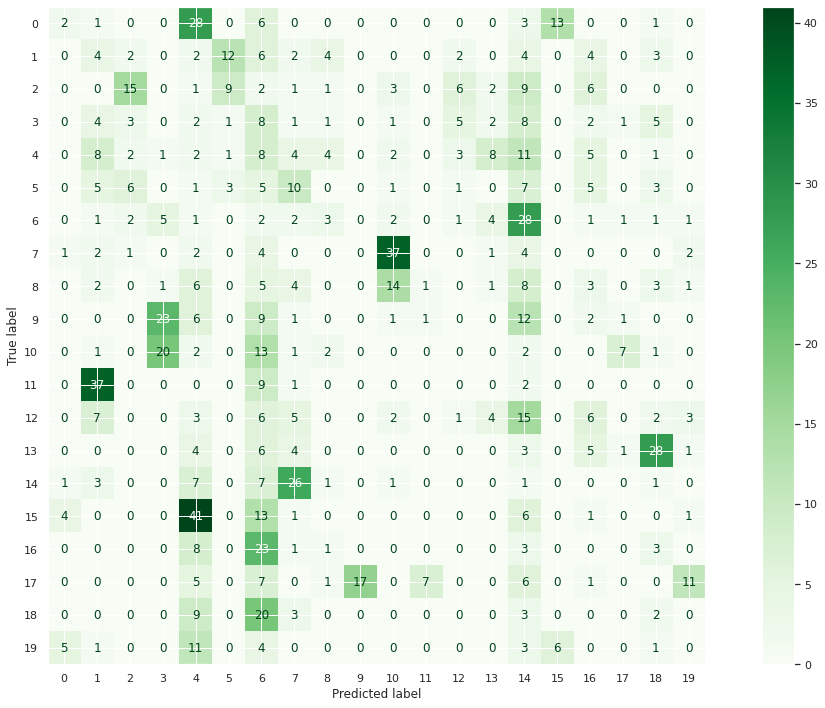

In [371]:
d = mtr.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dn)
fig, ax = plt.subplots(figsize=(16,10))
d.plot(ax=ax, cmap='Greens')
plt.tight_layout()
plt.show()

In [388]:
doc_15 = [x for i,x in enumerate(news['data'][:corpus_size]) if news['target'][i] == 15]

In [389]:
doc_6 = [x for i,x in enumerate(news['data'][:corpus_size]) if news['target'][i] == 4]

In [390]:
print(len(doc_15), len(doc_6))

67 60


In [391]:
vc = CountVectorizer(tokenizer=tokenizer)

In [392]:
for x in doc_6:
  doc_15.append(x)

In [393]:
X1 = vc.fit_transform(doc_15)

In [397]:
for x in X1.toarray()[:67 ,1]:
  print(x)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


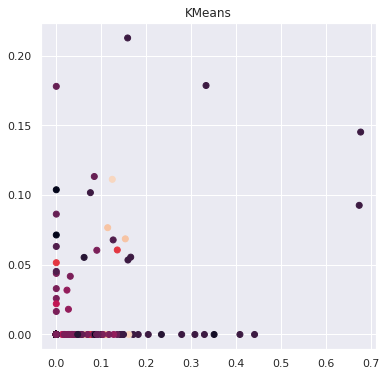

In [136]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title("KMeans")
ax.scatter(X.toarray()[:,0], X.toarray()[:,1], c=kmeans)
plt.show()